In [1]:
'''一、网格搜索、模型持久化：
code：
  1,GridSearchCV:网格搜索；
  2,模型持久化(模型保存至本地)；
  3,SMOTE：利用合成数据（插值）方法，调整sample数量；
  4，模型持久化：将经过清洗和特征工程后的数据存入本地，以便后续进一步建模分析；
  5，经过下采样后的数据训练结果。'''

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection  import train_test_split
import warnings
warnings.filterwarnings("ignore")


# 1,GridSearchCV:网格搜索
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=16)

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)   # cv=5：5折交叉验证
clf.fit(x_train, y_train)
print("最优参数列表:", clf.best_params_,';', "score值：",clf.best_score_)
print(sorted(clf.cv_results_.keys()))

最优参数列表: {'C': 1, 'kernel': 'rbf'} ; score值： 0.9833333333333333
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'mean_train_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split0_train_score', 'split1_test_score', 'split1_train_score', 'split2_test_score', 'split2_train_score', 'split3_test_score', 'split3_train_score', 'split4_test_score', 'split4_train_score', 'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score']


In [2]:
# 2,模型持久化(模型保存至本地):
from sklearn.externals import joblib

best_clf_model = clf.best_estimator_
joblib.dump(best_clf_model, "../OutPut/clf.model")
best_clf_model = joblib.load("../OutPut/clf.model") # 加载模型就可以用，无需重新训练
print(best_clf_model.predict(x_test))

[1 0 1 2 1 0 1 0 0 1 1 2 2 0 2 1 0 0 1 1 0 0 2 2 1 1 1 2 2 0]


In [3]:
# 3,SMOTE：利用合成数据（插值）方法，调整sample数量
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.combine import SMOTETomek

print(__doc__)

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],  # 生成数据
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=100, random_state=10)

pca = PCA(n_components=2)  # Instanciate a PCA object for the sake of easy visualisation
X_vis = pca.fit_transform(X)   # Fit and transform x to visualise inside a 2D feature space

sm = SMOTETomek()   # Apply SMOTE + Tomek links
X_resampled, y_resampled = sm.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

f, (ax1, ax2) = plt.subplots(1, 2)   # Two subplots, unpack the axes array immediately

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=0.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=0.5)
ax2.set_title('SMOTE + Tomek')

for ax in (ax1, ax2):   # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

一、网格搜索、模型持久化：
code：
  1,GridSearchCV:网格搜索；
  2,模型持久化(模型保存至本地)；
  3,SMOTE：利用合成数据（插值）方法，调整sample数量；
  4，模型持久化：将经过清洗和特征工程后的数据存入本地，以便后续进一步建模分析；
  5，经过下采样后的数据训练结果。


<Figure size 640x480 with 2 Axes>

In [4]:
# 4，模型持久化：将经过清洗和特征工程后的数据存入本地，以便后续进一步建模分析
from collections import Counter
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.metrics import classification_report_imbalanced
import pickle

print(__doc__)

categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     categories=categories)

X_train, y_train, X_test, y_test = newsgroups_train.data, newsgroups_train.target, newsgroups_test.data, newsgroups_test.target

print('Training class distributions summary: {}'.format(Counter(y_train)))
print('Test class distributions summary: {}'.format(Counter(y_test)))


with open('../OutPut/newsgroups_train.pickle','wb') as handle:   # 把数据存在pickle中
    pickle.dump(newsgroups_train,handle)

with open('../OutPut/newsgroups_test.pickle','wb') as handle:
    pickle.dump(newsgroups_test,handle)
    
with open('../OutPut/newsgroups_train.pickle','rb') as handle:   # 读数据
    newsgroups_train = pickle.load(handle)

with open('../OutPut/newsgroups_test.pickle','rb') as handle:
    newsgroups_test = pickle.load(handle)


pipe = make_pipeline(TfidfVectorizer(),    # 原始数据类别不平衡训练结果
                     MultinomialNB())
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

一、网格搜索、模型持久化：
code：
  1,GridSearchCV:网格搜索；
  2,模型持久化(模型保存至本地)；
  3,SMOTE：利用合成数据（插值）方法，调整sample数量；
  4，模型持久化：将经过清洗和特征工程后的数据存入本地，以便后续进一步建模分析；
  5，经过下采样后的数据训练结果。
Training class distributions summary: Counter({2: 593, 1: 584, 0: 480, 3: 377})
Test class distributions summary: Counter({2: 394, 1: 389, 0: 319, 3: 251})
                   pre       rec       spe        f1       geo       iba       sup

          0       0.67      0.94      0.86      0.79      0.90      0.82       319
          1       0.96      0.92      0.99      0.94      0.95      0.90       389
          2       0.87      0.98      0.94      0.92      0.96      0.92       394
          3       0.97      0.36      1.00      0.52      0.60      0.33       251

avg / total       0.87      0.84      0.94      0.82      0.88      0.78      1353



In [5]:
# 5，经过下采样后的数据训练结果：
pipe = make_pipeline_imb(TfidfVectorizer(),
                         RandomUnderSampler(),
                         MultinomialNB())

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.69      0.90      0.87      0.78      0.89      0.79       319
          1       0.98      0.84      0.99      0.90      0.91      0.82       389
          2       0.95      0.88      0.98      0.92      0.93      0.86       394
          3       0.79      0.73      0.96      0.76      0.84      0.68       251

avg / total       0.87      0.85      0.95      0.85      0.90      0.80      1353



In [6]:
'''二、验证曲线、学习曲线、ROC曲线、准确度、精确率、召回率、F1_Score：
code：
  1, 建立随机森林模型；
  2,验证曲线；
  3,学习曲线；
  4,ROC曲线；
  5，计算准确度、精确率、召回率、F1_Score(综合评价指标)。'''

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve,learning_curve

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
%matplotlib inline

# 1,建立随机森林模型:
iris_data = load_iris()
features = iris_data.data
labels = iris_data.target
 
RF = RandomForestClassifier(max_depth = 8, random_state = 0)
params_grid = np.linspace(25,200,8).astype(int)

######Validation Curve
train_score
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] validation_score
 [[0.96666667 0.96666667 0.9        0.96666667 1.        ]
 [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
 [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
 [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
 [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
 [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
 [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
 [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]]


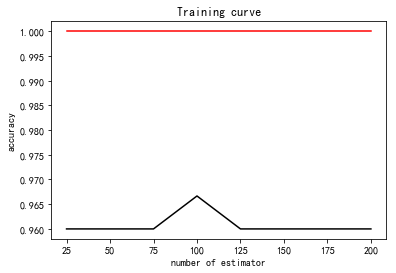

In [7]:
# 2,验证曲线：
train_scores,validation_scores = validation_curve(RF,features,labels,'n_estimators',params_grid,cv=5)  #其他参数不变，观察评估器数量对训练得分的影响
print('######Validation Curve')
print('train_score\n',train_scores, 'validation_score\n',validation_scores)

plt.figure()   #可视化生成训练、验证曲线
plt.plot(params_grid, np.average(train_scores,axis = 1),color = 'red')
plt.plot(params_grid,np.average(validation_scores,axis = 1),color = 'black')
plt.title('Training curve')
plt.xlabel('number of estimator')
plt.ylabel('accuracy')
plt.show()  #同样的方法可以验证其他变量对训练的影响，多次操作，进行参数调整

150
######Learning Curve
train_score
 [[1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         0.98809524 0.98809524]
 [1.         1.         1.         0.99166667 0.99166667]] validation_score
 [[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [0.83333333 0.83333333 0.86666667 0.93333333 0.8       ]
 [0.96666667 0.96666667 0.9        0.93333333 1.        ]]


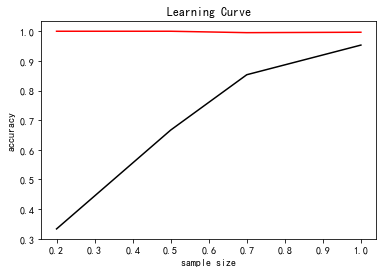

In [8]:
# 3,学习曲线:
print(len(features))
size_grid = np.array([0.2,0.5,0.7,1])
train_size,train_scores,validation_scores = learning_curve(RF,features,labels,train_sizes = size_grid, cv = 5)
print('######Learning Curve')
print('train_score\n',train_scores, 'validation_score\n',validation_scores)

plt.figure()  # 学习曲线可视化
plt.plot(size_grid,np.average(train_scores, axis = 1), color = 'red')
plt.plot(size_grid, np.average(validation_scores, axis = 1), color = 'black')
plt.title('Learning Curve')
plt.xlabel('sample size')
plt.ylabel('accuracy')
plt.show()

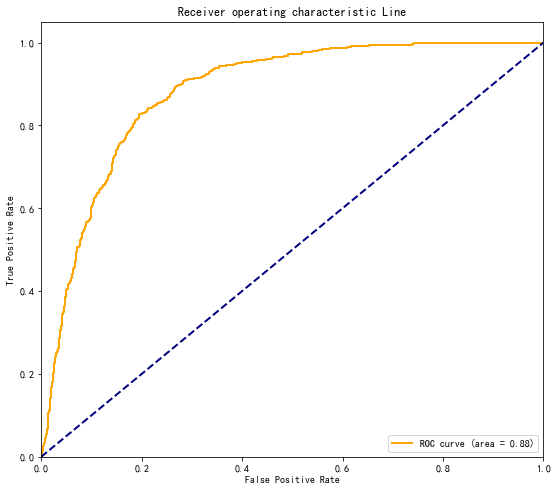

In [9]:
# 4,ROC曲线：
X,y = make_classification(n_samples=10000,n_features=10,n_classes=2,n_informative=5)
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

clf = LogisticRegression()
clf.fit(X_train,y_train)

preds = clf.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test,preds)

df = pd.DataFrame(dict(fpr=fpr,tpr=tpr))

roc_auc= roc_auc_score(y_test,preds)

plt.figure(figsize=[9,8])  # 画图
lw = 2
plt.plot(fpr, tpr, color='orange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Line')
plt.legend(loc="lower right")
plt.show()

In [10]:
# 5，计算准确度、精确率、召回率、F1_Score：
y_true =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0]
y_pred =  [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0]

accu=accuracy_score(y_true,y_pred)        # 准确度
prec = precision_score(y_true,y_pred)     # 精确率
reca = recall_score(y_true,y_pred)        # 召回率
F1_score = f1_score(y_true,y_pred)        # 综合评价指标：F1_Score
print('accuracy = %f, precision = %f, recall = %f, F1_score = %f '% (accu, prec, reca, F1_score))

accuracy = 0.720000, precision = 0.166667, recall = 0.333333, F1_score = 0.222222 
